<a href="https://colab.research.google.com/github/jobsiggang/2026_AI_Datascience/blob/main/keris_%EB%8D%B0%EC%9D%B4%ED%84%B0_4%EC%B0%A8%EC%8B%9C_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 생존자 예측 프로젝트
https://www.kaggle.com/datasets/rahulsah06/titanic

캐글 타이타닉 데이터셋을 사용하여 생존 여부를 예측하는 모델을 구축하는 과정을 다룹니다. 목표는 탑승객의 다양한 정보를 활용하여 누가 생존하고 누가 생존하지 못했는지 예측하는 것입니다. 이를 통해 데이터 분석의 기본 개념과 머신러닝 예측 모델의 기초를 이해할 수 있습니다.

###데이터 로드

In [177]:
#zip파일을 압축을 풀어 데이터셋을 업로드함.
#구글드라이브에 마운트해야 외부저장가능, 현재는 임시저장상태임.
import os
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  full_path = os.path.join(os.getcwd(), fn)
  print('User uploaded file "{name}" with length {length} bytes at path "{path}"'.format(
      name=fn, length=len(uploaded[fn]), path=full_path))


Saving gender_submission.csv to gender_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv
User uploaded file "gender_submission (2).csv" with length 3258 bytes at path "/content/gender_submission (2).csv"
User uploaded file "test (2).csv" with length 28629 bytes at path "/content/test (2).csv"
User uploaded file "train (2).csv" with length 61194 bytes at path "/content/train (2).csv"


In [178]:
#데이터 분석을 위한 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
# 훈련 데이터셋 로드
df_train = pd.read_csv("/content/train.csv" )
# 테스트 데이터셋 로드
df_test = pd.read_csv("/content/test.csv")
# 제출 양식 데이터셋 로드
df_sumission = pd.read_csv("/content/gender_submission.csv")

## 데이터 품질 확인 및 결측치 처리
Age, Embarked 등 주요 컬럼의 결측치(missing value)를 확인하고, 간단한 결측치 처리 방안(예: 최빈값, 평균값 등으로 대체)



In [180]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
# 데이터프레임의 전반적인 정보(컬럼, 결측치 여부, 데이터 타입)를 확인
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [182]:
# 데이터프레임의 수치형 데이터에 대한 통계적 요약(평균, 표준편차 등)을 확인
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [183]:
df_train['Embarked'].isnull().sum() # 'Embarked' 컬럼의 결측치 수를 확인

np.int64(2)

In [184]:
df_train['Embarked'].value_counts() # 'Embarked' 컬럼의 값 분포를 확인하여 최빈값을 파악

,count
Embarked,
S,644
C,168
Q,77


In [185]:
df_train['Age'].isnull().sum() # 'Age' 컬럼의 결측치 수를 확인

np.int64(177)

In [186]:
df_train['Age'].value_counts() # 'Age' 컬럼의 값 분포 확인

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


In [187]:
#중앙값 확인
df_train['Age'].median()

28.0

In [188]:
# Cabin Category를 크게 정리
df_train['Cabin'] = df_train['Cabin'].str[:1]

df_train.Cabin.value_counts()

,count
Cabin,
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [189]:
# 머신러닝 모델은 NULL을 허용하지 않으므로 결측치 처리 수행 - 대체값
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Cabin'] = df_train['Cabin'].fillna('N')
df_train['Embarked'] = df_train['Embarked'].fillna('N')
print('NULL 갯수 : \n', df_train.isnull().sum())

NULL 갯수 : 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## 데이터 선택 및 필터링

특정 컬럼 선택, 조건에 따른 레코드 필터링, 여러 조건을 결합한 필터링 등 데이터 조작

In [190]:
# 'PassengerId', 'Name', 'Survived' 컬럼 선택
coulmns_selection = df_train[["PassengerId", "Name", "Survived"]]
coulmns_selection

,PassengerId,Name,Survived
0,1,"Braund, Mr. Owen Harris",0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,"Heikkinen, Miss. Laina",1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,5,"Allen, Mr. William Henry",0
...,...,...,...
886,887,"Montvila, Rev. Juozas",0
887,888,"Graham, Miss. Margaret Edith",1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",0
889,890,"Behr, Mr. Karl Howell",1


In [191]:
# 'Sex' 컬럼이 'female'인 레코드만 필터링
rows_selection = df_train[df_train["Sex"]=="female"]
rows_selection

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,N,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,N,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,N,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,N,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,N,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S


**Reasoning**:
Continuing to add comments, I will now add a comment to the cell `10n9809USth6` to explain the purpose of selecting specific columns and filtering records based on a condition.



In [192]:
# 'PassengerId', 'Name' 컬럼을 선택하고 'Sex'가 'female'인 레코드만 필터링
df_train[["PassengerId","Name"]][df_train["Sex"]=="female"]

,PassengerId,Name
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,10,"Nasser, Mrs. Nicholas (Adele Achem)"
...,...,...
880,881,"Shelley, Mrs. William (Imanita Parrish Hall)"
882,883,"Dahlberg, Miss. Gerda Ulrika"
885,886,"Rice, Mrs. William (Margaret Norton)"
887,888,"Graham, Miss. Margaret Edith"


In [193]:
# 'Sex'가 'female'이고 'Embarked'가 'S'인 레코드만 필터링
df_train[(df_train["Sex"]=="female") & (df_train["Embarked"]=="S")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,N,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,N,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S


In [194]:
# 'Embarked'가 'S'이고 'Age'가 30보다 큰 테스트 데이터의 특정 컬럼을 선택하고 필터링
df_test_S_30 = df_test[["PassengerId","Name","Embarked", "Age"]][(df_test["Embarked"]=="S") & (df_test["Age"]>30)]
df_test_S_30

,PassengerId,Name,Embarked,Age
1,893,"Wilkes, Mrs. James (Ellen Needs)",S,47.0
11,903,"Jones, Mr. Charles Cresson",S,46.0
13,905,"Howard, Mr. Benjamin",S,63.0
14,906,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",S,47.0
25,917,"Robins, Mr. Alexander A",S,50.0
...,...,...,...,...
387,1279,"Ashby, Mr. John",S,57.0
391,1283,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",S,51.0
393,1285,"Gilbert, Mr. William",S,47.0
401,1293,"Gale, Mr. Harry",S,38.0


## 데이터 집계 및 분석
groupby와 mean 등의 함수를 사용하여 데이터 집계 및 분석을 수행


In [195]:
# 'Survived'가 1이고 'Sex'가 'male'인 승객의 평균 'Age'를 계산하여 남성 생존자의 평균 연령
df_train[["Sex","Age"]][(df_train["Sex"]=="male") & (df_train["Survived"]==1)].groupby("Sex").mean()

,Age
Sex,
male,27.382294


In [196]:
# 'Embarked'가 'S'이고 'Age'가 30 초과인 테스트 승객의 평균 'Age' 계산
df_test_S_30["Age"].mean()

np.float64(43.916666666666664)

In [197]:
# 30세 초과 테스트 승객의 'Age'를 'Embarked'별로 그룹화하여 평균 분석
df_test_30[["Embarked","Age"]].groupby("Embarked").mean()

,Age
Embarked,
C,45.489130
Q,41.562500
S,43.916667


## 시각화를 통한 데이터 이해
matplotlib을 사용하여 Pclass, Sex 등의 특징과 Survived 간의 관계를 시각화와 인사이트 설명


[데이터 탐색]
어떤 유형의 승객이 생존확률이 더 높았을지 확인 (가설)

여성 또는 노약자 먼저 구한다.

부자 또는 유명인

삼등실 승객들

In [198]:
# 성별에 따른 생존 결과 확인 (0 : 사망, 1 : 생존)
#여성 중 생존한 그룹, 여성 중 사망한 그룹, 남성 중 생존한 그룹, 남성 중 사망한 그룹.
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

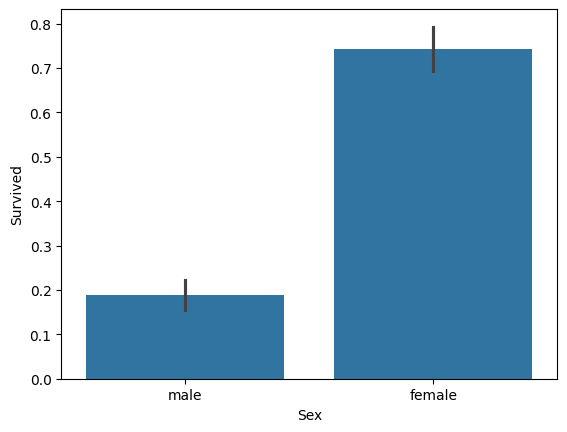

In [199]:
#여성 생존률 = 생존한 여성 수 / 전체 여성 수
#barplot이란?
#**막대그래프(bar chart)**를 그리는 Seaborn 함수.
#x축이나 y축에 범주형 데이터를 두고, 다른 축에 수치형 데이터를 두면, 해당 범주별로 평균값 또는 통계치를 막대 높이로 표현해줌.
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.show()                               # 1 가설 중 여성이 상대적으로 더 많이 생존

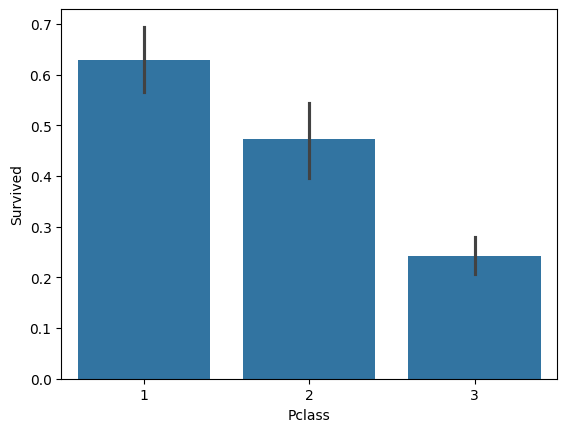

In [200]:
#  'Pclass'가 생존율에 미치는 영향을 파악
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.show()

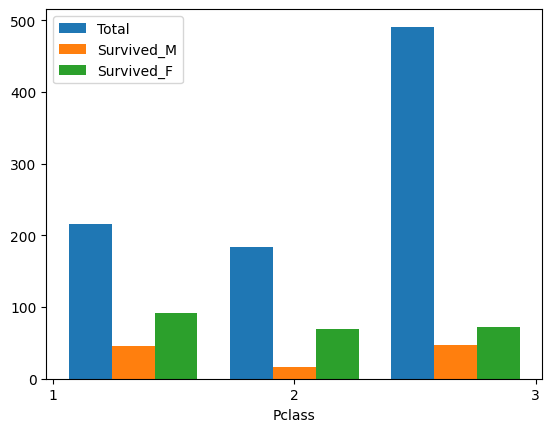

In [201]:
# 'Pclass'별 전체 승객 수, 남성 생존자, 여성 생존자 수를 비교하는 히스토그램
# 성별과 'Pclass'가 생존율에 미치는 영향 분석
df_survived=df_train[df_train.Survived==1]
plt.hist([df_train['Pclass'],df_survived_m['Pclass'],df_survived_f['Pclass']],bins=3)
plt.legend(['Total','Survived_M','Survived_F'])
plt.xticks([1,2,3])
plt.xlabel('Pclass')
plt.show()

## 간단한 규칙 기반 생존 예측 구현
조건에 따라 생존 여부를 예측


In [202]:
# df_test와 df_sumission 데이터프레임을 'PassengerId'를 기준으로 inner merge
# how:
# inner 일치하는 항목 병합
# left 또는 right 주 파일의 방향에 따라
# outer 불일치
df_merged = pd.merge(df_test, df_sumission, on="PassengerId", how="inner")
df_answer = df_merged[["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age",	"SibSp",	"Parch",	"Ticket",	"Fare",	"Cabin",	"Embarked"]]
df_answer

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [203]:
# 'Pclass'가 1인 여성 승객이거나 20세 이상 36세 이하인 승객의 생존 여부를 1로 예측
condition = (
    ((df_answer["Pclass"] == 1) & (df_answer["Sex"] == "female")) |
    ((df_answer["Age"] >= 20) & (df_answer["Age"] <= 36))
)

df_answer.loc[condition, "Survived"] = 1
df_answer[["PassengerId", "Survived"]]

,PassengerId,Survived
0,892,1
1,893,1
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [204]:
# 생성된 예측 결과를 제출 형식에 맞게  CSV 파일로 저장
df_answer[["PassengerId", "Survived"]] .to_csv("predict.csv",index=False)